# Load Models & Modules

In [1]:
%load_ext autoreload
%autoreload 2

# Loading train and test data with transforms and loader functions

In [2]:
from data_loader import *

# Loading test and train data & dataloader
cifar10 = dataset_cifar10(batch_size=512)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=False)

classes = cifar10.classes

/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


CUDA availability ? True


100%|██████████| 170498071/170498071 [00:02<00:00, 73562859.52it/s]


Extracting ./Data/cifar-10-python.tar.gz to ./Data
Files already downloaded and verified


In [3]:
len(trainloader),len(testloader)

(98, 20)

In [4]:
98*512, 20*512

(50176, 10240)

In [5]:
50176+10240

60416

# Exploratory Data Analysis

## Summary Statistics

In [6]:
cifar10.data_summary_stats()

Files already downloaded and verified
Files already downloaded and verified
(60000, 32, 32, 3)
[0.49186878 0.48265391 0.44717728]
[0.24697121 0.24338894 0.26159259]


## Plotting sample images

Files already downloaded and verified


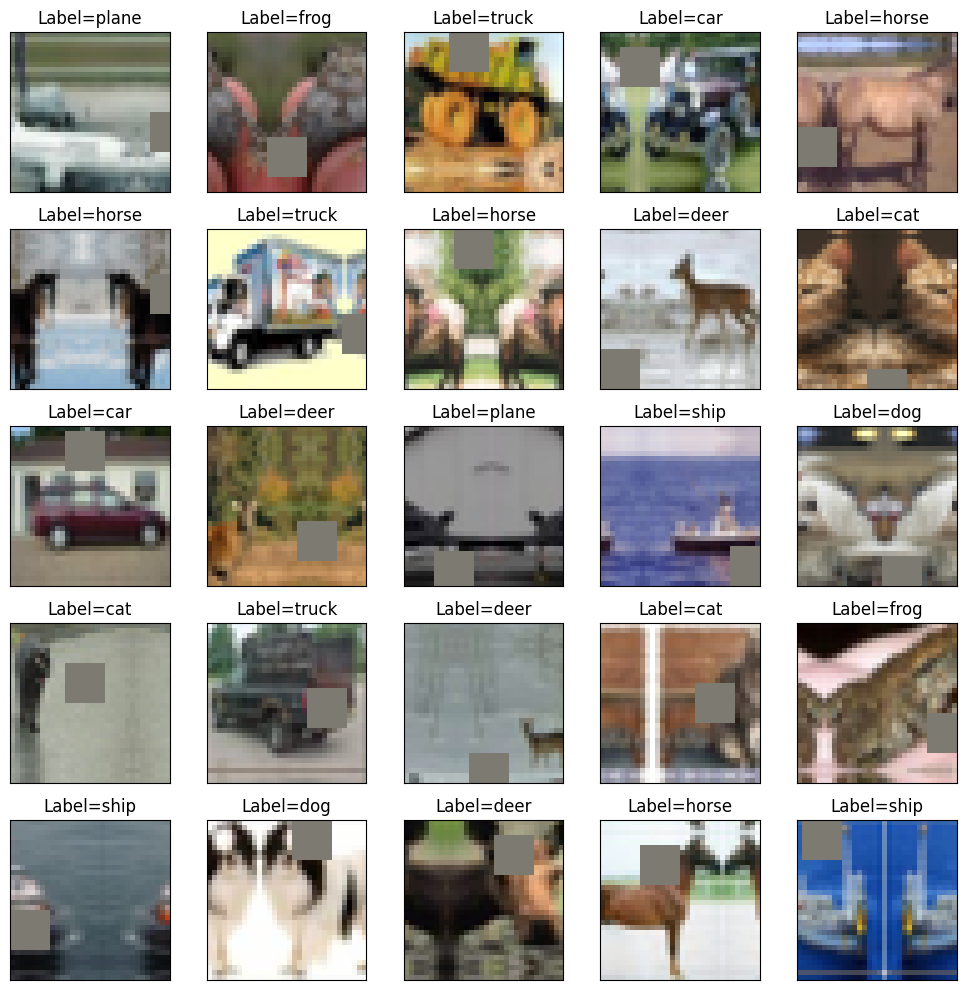

In [7]:
cifar10.sample_pictures(train_flag=True)

## Model

In [15]:
from model import *

# Loading Custom Model
net = Net()

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


## Model Summary

In [9]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
                 X-8          [-1, 128, 16, 16]               0
            Conv2d-9          [-1, 128, 16, 16]         147,456
      BatchNorm2d-10          [-1, 128, 16, 16]             256
             ReLU-11          [-1, 128, 16, 16]               0
           Conv2d-12          [-1, 128, 16, 16]         147,456
      BatchNorm2d-13          [-1, 128, 16, 16]             256
             ReLU-14          [-1, 128,

## LR FINDER

  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 5.34E-03


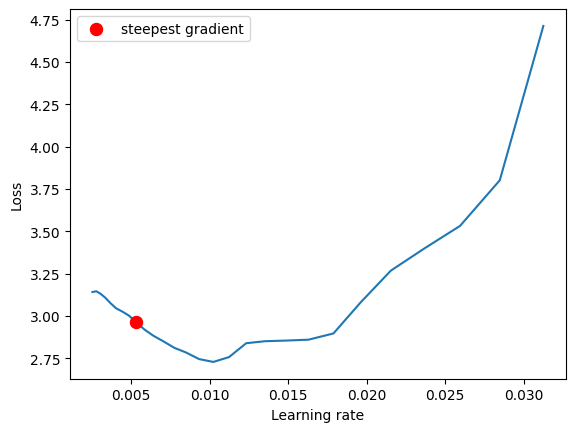

In [14]:
#https://github.com/davidtvs/pytorch-lr-finder
!pip install torch-lr-finder
import copy
import torch
from torch_lr_finder import LRFinder
import torch.nn as nn
import torch.optim as optim
import numpy as np

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1e-3, weight_decay=1e-2)
lr_finder = LRFinder(net, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, val_loader=testloader, end_lr=10, num_iter=100, step_mode="exp")
lr_finder.plot(log_lr=False)
lr_finder.reset()


## Define a Loss function and optimizer

In [16]:
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1) #, momentum=0.85)
#scheduler = StepLR(optimizer, step_size=6, gamma=0.2)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=5.4E-3, steps_per_epoch=len(trainloader),
                                                epochs=24,pct_start=500/2400,
                                                anneal_strategy='linear')#0.01

## Training & Testing

Epoch: 0,Loss=1.19 Batch_id=97 Accuracy=46.07: 100%|██████████| 98/98 [00:26<00:00,  3.75it/s]


Test set: Average loss: 0.0026, Accuracy: 5560/10000 (55.60%)



Epoch: 1,Loss=0.99 Batch_id=97 Accuracy=61.73: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]


Test set: Average loss: 0.0021, Accuracy: 6563/10000 (65.63%)



Epoch: 2,Loss=0.97 Batch_id=97 Accuracy=68.07: 100%|██████████| 98/98 [00:26<00:00,  3.68it/s]


Test set: Average loss: 0.0017, Accuracy: 7067/10000 (70.67%)



Epoch: 3,Loss=1.02 Batch_id=97 Accuracy=71.11: 100%|██████████| 98/98 [00:26<00:00,  3.77it/s]


Test set: Average loss: 0.0017, Accuracy: 7257/10000 (72.57%)



Epoch: 4,Loss=0.67 Batch_id=97 Accuracy=72.10: 100%|██████████| 98/98 [00:26<00:00,  3.76it/s]


Test set: Average loss: 0.0022, Accuracy: 6817/10000 (68.17%)



Epoch: 5,Loss=0.58 Batch_id=97 Accuracy=76.47: 100%|██████████| 98/98 [00:26<00:00,  3.73it/s]


Test set: Average loss: 0.0012, Accuracy: 8018/10000 (80.18%)



Epoch: 6,Loss=0.62 Batch_id=97 Accuracy=79.45: 100%|██████████| 98/98 [00:25<00:00,  3.79it/s]


Test set: Average loss: 0.0014, Accuracy: 7721/10000 (77.21%)



Epoch: 7,Loss=0.56 Batch_id=97 Accuracy=80.68: 100%|██████████| 98/98 [00:26<00:00,  3.73it/s]


Test set: Average loss: 0.0009, Accuracy: 8420/10000 (84.20%)



Epoch: 8,Loss=0.41 Batch_id=97 Accuracy=83.37: 100%|██████████| 98/98 [00:26<00:00,  3.71it/s]


Test set: Average loss: 0.0009, Accuracy: 8536/10000 (85.36%)



Epoch: 9,Loss=0.41 Batch_id=97 Accuracy=84.67: 100%|██████████| 98/98 [00:26<00:00,  3.74it/s]


Test set: Average loss: 0.0010, Accuracy: 8409/10000 (84.09%)



Epoch: 10,Loss=0.37 Batch_id=97 Accuracy=85.19: 100%|██████████| 98/98 [00:25<00:00,  3.79it/s]


Test set: Average loss: 0.0009, Accuracy: 8524/10000 (85.24%)



Epoch: 11,Loss=0.39 Batch_id=97 Accuracy=86.30: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Test set: Average loss: 0.0008, Accuracy: 8681/10000 (86.81%)



Epoch: 12,Loss=0.32 Batch_id=97 Accuracy=87.70: 100%|██████████| 98/98 [00:26<00:00,  3.76it/s]


Test set: Average loss: 0.0007, Accuracy: 8805/10000 (88.05%)



Epoch: 13,Loss=0.40 Batch_id=97 Accuracy=88.66: 100%|██████████| 98/98 [00:26<00:00,  3.74it/s]


Test set: Average loss: 0.0007, Accuracy: 8786/10000 (87.86%)



Epoch: 14,Loss=0.39 Batch_id=97 Accuracy=89.24: 100%|██████████| 98/98 [00:25<00:00,  3.78it/s]


Test set: Average loss: 0.0007, Accuracy: 8846/10000 (88.46%)



Epoch: 15,Loss=0.36 Batch_id=97 Accuracy=90.23: 100%|██████████| 98/98 [00:26<00:00,  3.76it/s]


Test set: Average loss: 0.0006, Accuracy: 8922/10000 (89.22%)



Epoch: 16,Loss=0.24 Batch_id=97 Accuracy=91.03: 100%|██████████| 98/98 [00:26<00:00,  3.73it/s]


Test set: Average loss: 0.0006, Accuracy: 8997/10000 (89.97%)



Epoch: 17,Loss=0.29 Batch_id=97 Accuracy=91.69: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]


Test set: Average loss: 0.0006, Accuracy: 8938/10000 (89.38%)



Epoch: 18,Loss=0.22 Batch_id=97 Accuracy=92.29: 100%|██████████| 98/98 [00:26<00:00,  3.74it/s]


Test set: Average loss: 0.0006, Accuracy: 8995/10000 (89.95%)



Epoch: 19,Loss=0.17 Batch_id=97 Accuracy=92.96: 100%|██████████| 98/98 [00:27<00:00,  3.60it/s]


Test set: Average loss: 0.0006, Accuracy: 8979/10000 (89.79%)



Epoch: 20,Loss=0.14 Batch_id=97 Accuracy=93.52: 100%|██████████| 98/98 [00:26<00:00,  3.74it/s]


Test set: Average loss: 0.0006, Accuracy: 9068/10000 (90.68%)



Epoch: 21,Loss=0.13 Batch_id=97 Accuracy=94.48: 100%|██████████| 98/98 [00:26<00:00,  3.77it/s]


Test set: Average loss: 0.0006, Accuracy: 9095/10000 (90.95%)



Epoch: 22,Loss=0.13 Batch_id=97 Accuracy=94.78: 100%|██████████| 98/98 [00:26<00:00,  3.74it/s]


Test set: Average loss: 0.0005, Accuracy: 9168/10000 (91.68%)



Epoch: 23,Loss=0.12 Batch_id=97 Accuracy=95.16: 100%|██████████| 98/98 [00:25<00:00,  3.78it/s]


Test set: Average loss: 0.0005, Accuracy: 9151/10000 (91.51%)

Finished Training


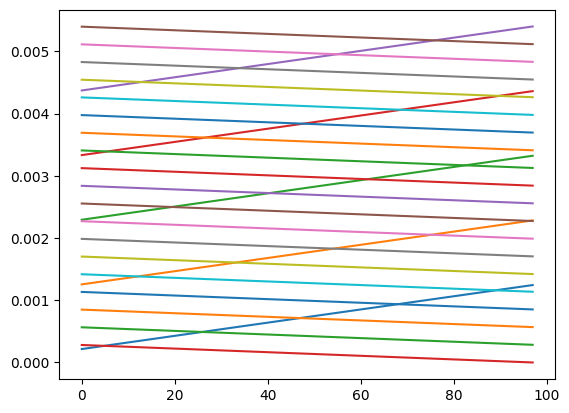

In [17]:
# Load train and test model
from main_new import *

train = train()
test = test()

EPOCHS= 24

for epoch in range(EPOCHS):  # loop over the dataset multiple times
  #train.execute(net, device, batch, optimizer, criterion, epoch)
  train.execute(net, device, trainloader, optimizer, scheduler, criterion, epoch)
  test.execute(net, device, testloader, criterion)

print('Finished Training')

## Display an image from the test set

Files already downloaded and verified


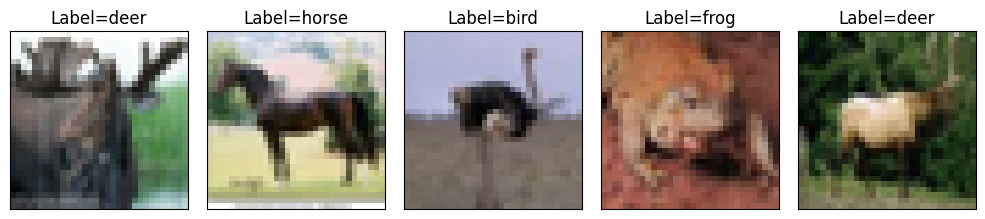

In [18]:
images, labels = cifar10.sample_pictures(train_flag=False, return_flag = True)

## Prediction of sampe test set

In [19]:
images,labels = images.to(device),labels.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(5)))

Predicted:   deer horse  bird  frog  deer


## Evaluating Training Accuracy

In [20]:
from evaluate import *
calAccuracy(net, trainloader, device)

Accuracy of the network on the  train images: 94.486 %%


## Evaluating Test Accuracy

In [21]:
calAccuracy(net, testloader, device)

Accuracy of the network on the  train images: 91.51 %%


## Evaluating test Accuracy over different classes

In [22]:
calClassAccuracy(net, testloader,classes, device)

Accuracy of plane : 71 %
Accuracy of   car : 60 %
Accuracy of  bird : 83 %
Accuracy of   cat : 90 %
Accuracy of  deer : 60 %
Accuracy of   dog : 100 %
Accuracy of  frog : 100 %
Accuracy of horse : 90 %
Accuracy of  ship : 100 %
Accuracy of truck : 100 %


## Misclassified Images

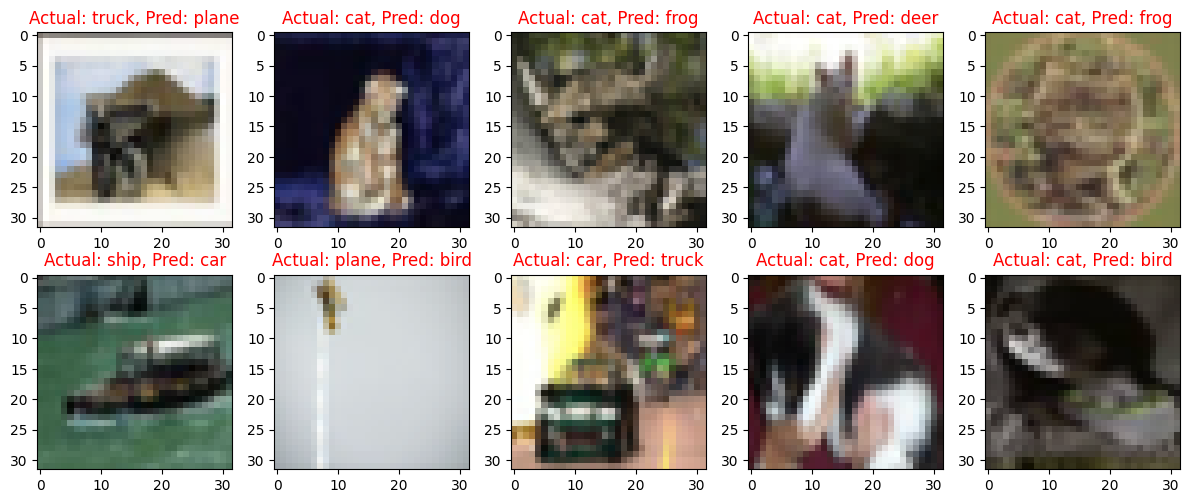

In [23]:
from utils import plot_misclassified_images
plot_misclassified_images(net, testloader, classes, device)